In [ ]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
from scipy.spatial import distance
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

In [ ]:
#8bit png dirctory
RAW_PNG_DIR = ('/content/Transcript_No.tif')
Over_Lay = ('/content/Transcript.tif')
img_overlay = mpimg.imread(Over_Lay)

Data type: uint8, Min: 0, Max: 255
Data type: uint8, Min: 2, Max: 32


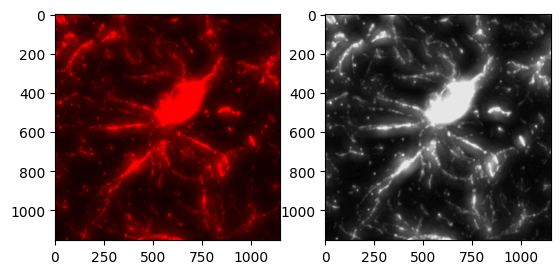

In [ ]:
img = mpimg.imread(RAW_PNG_DIR)
print(f"Data type: {img.dtype}, Min: {img.min()}, Max: {img.max()}")
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

if img.max() <= 1.0:
    img_grayscale = (img_grayscale * 255).astype(np.uint8)
print(f"Data type: {img_grayscale.dtype}, Min: {img_grayscale.min()}, Max: {img_grayscale.max()}")

fig, ax = plt.subplots(ncols = 2)
ax[0].imshow(img)
ax[1].imshow(img_grayscale, cmap='gray')

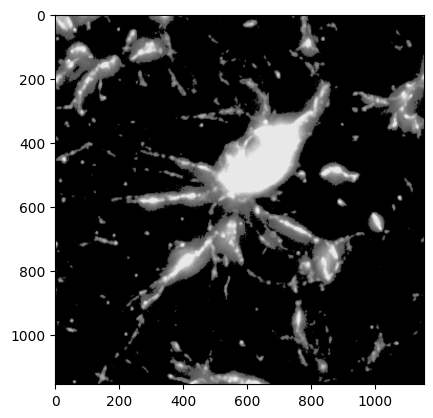

In [ ]:
n, m = img_grayscale.shape
clean_img = np.zeros_like(img_grayscale)

for row in range(1,n):
    for col in range(1,m):
        local_pixel = img_grayscale[row, col]
        #print(local_pixel)
        if local_pixel > 10:
          change_pixel = img_grayscale[row, col]
        else:
          change_pixel = 0

        clean_img[row,col]= change_pixel
        print

#clean_img = clean_img.astype('CV_8U')

plt.imshow(clean_img, cmap='gray')

2056


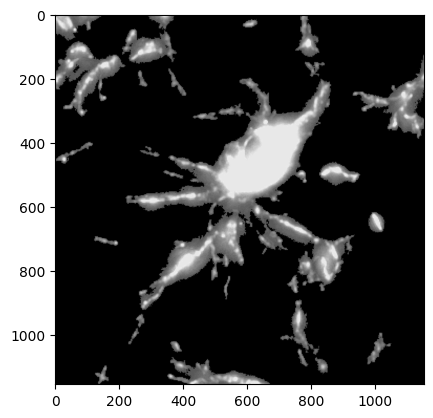

In [ ]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(clean_img, connectivity=8, ltype=cv2.CV_32S)

areas = [np.sum(labels == i) for i in range(1, num_labels)]
min_area = 20
print(num_labels)
filtered_img = np.zeros_like(labels)

for label, area in enumerate(areas, start=1):
    if area >= 500:
        filtered_img[labels == label] = clean_img[labels == label]

plt.imshow(filtered_img, cmap='gray')

In [ ]:
vertical_filter = [[-1,-2,-1], [0,0,0], [1,2,1]]
horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]
file_count = 0

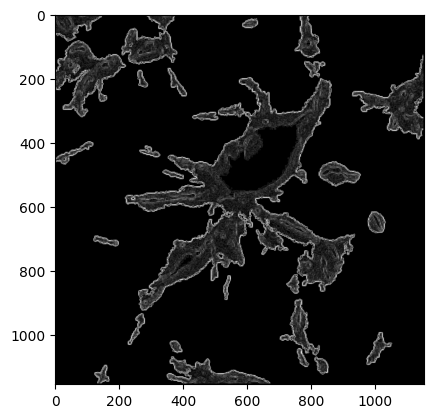

In [ ]:
n, m = filtered_img.shape
edges_img = np.zeros_like(filtered_img)

for row in range(3,n-2):
    for col in range(3,m-2):
        local_pixels = filtered_img[row-1:row+2, col-1:col+2]

        vertical_transformed_pixels = vertical_filter*local_pixels
        vertical_score = vertical_transformed_pixels.sum()

        horizontal_transformed_pixels = horizontal_filter*local_pixels
        horizontal_score = horizontal_transformed_pixels.sum()

        edge_score = (vertical_score**2 + horizontal_score**2)**.5

        edge_score = (edge_score)**0.8

        if edge_score >= 0.2:
            edge_score=edge_score**0.6

        edges_img[row,col]= edge_score

edges_img2 = np.zeros_like(edges_img)

for row in range(3,n-2):
    for col in range(3,m-2):
        local_pixels = edges_img[row-1:row+2, col-1:col+2]

        vertical_transformed_pixels = vertical_filter*local_pixels
        vertical_score = vertical_transformed_pixels.sum()

        horizontal_transformed_pixels = horizontal_filter*local_pixels
        horizontal_score = horizontal_transformed_pixels.sum()

        edge_score = (vertical_score**2 + horizontal_score**2)**.5

        edges_img2[row,col]= edge_score
plt.imshow(edges_img2, cmap='gray')


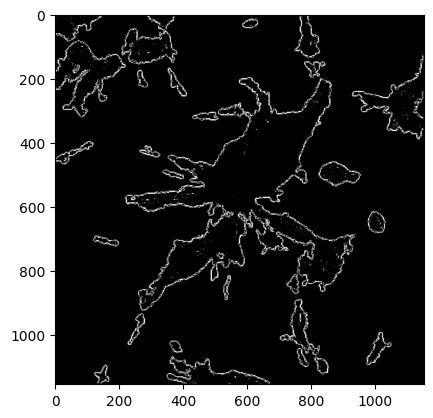

In [ ]:
edges_max = np.zeros_like(edges_img2)

for row in range(1,n):
    for col in range(1,m):
        local_pixel = edges_img2[row, col]
        #print(local_pixel)
        if local_pixel > 14:
          change_pixel = 1
        else:
          change_pixel = 0

        edges_max[row,col]= change_pixel

plt.imshow(edges_max, cmap='gray')

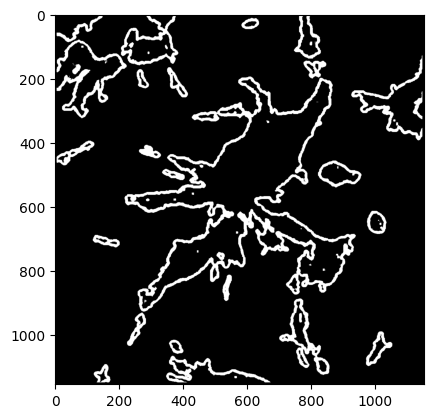

In [ ]:
smooth_img = np.zeros_like(edges_max,dtype=np.uint8)

for row in range(5,n-5):
    for col in range(5,m-5):
        local_pixels = edges_max[row-4:row+4, col-4:col+4]
        smooth_score = local_pixels.sum()
        if smooth_score >= 10:
          smooth_img[row,col] = 1
        else:
          smooth_img[row,col] = 0
        #print(row,col,smooth_score,smooth_img[row, col])
plt.imshow(smooth_img, cmap='gray')

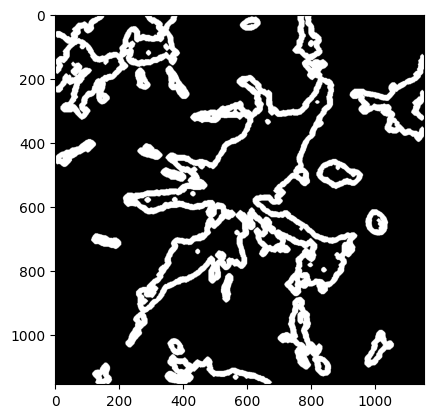

In [ ]:
dilation_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
dilated_img = cv2.morphologyEx(smooth_img, cv2.MORPH_DILATE, dilation_kernel, iterations=5)
plt.imshow(dilated_img, cmap='gray')

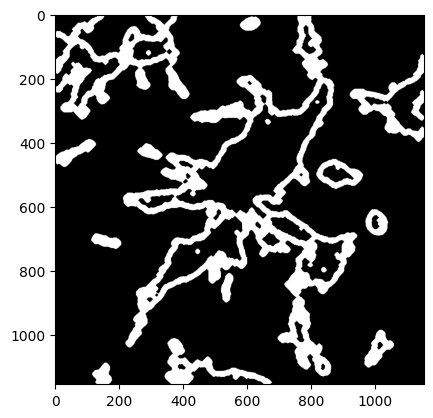

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
connected_img = cv2.morphologyEx(dilated_img, cv2.MORPH_CLOSE, kernel, iterations=5)
plt.imshow(connected_img, cmap='gray')

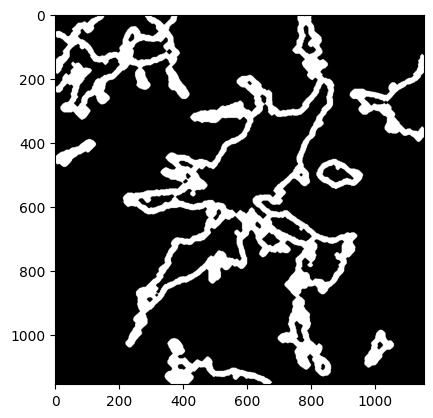

In [ ]:
num_labels, labels_im = cv2.connectedComponents(connected_img)
areas = [np.sum(labels_im == i) for i in range(1, num_labels)]

cleaned_img = np.zeros_like(labels_im)

for label, area in enumerate(areas, start=1):
    if area >= 4000:
        cleaned_img[labels_im == label] = 255

cleaned_img = cleaned_img.astype('uint8')
plt.imshow(cleaned_img, cmap='gray')

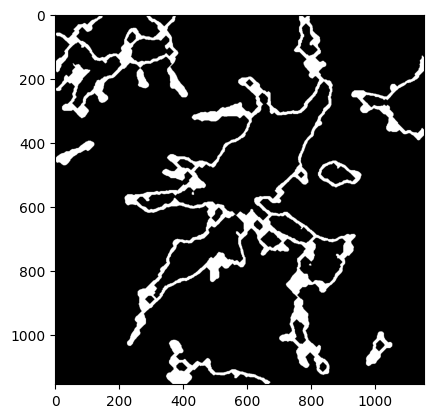

In [ ]:
erosion_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
eroded_img = cv2.morphologyEx(cleaned_img, cv2.MORPH_ERODE, erosion_kernel, iterations=5)
plt.imshow(eroded_img, cmap='gray')

TypeError: ignored

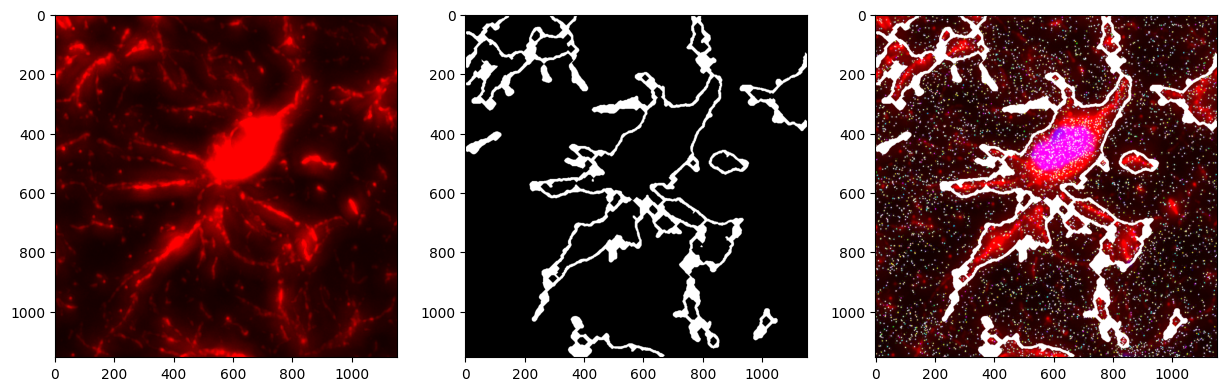

In [ ]:
overlay_img = np.zeros_like(img)

for row in range(1,n):
    for col in range(1,m):
        local_pixel = eroded_img[row, col]
        #print(local_pixel)
        if local_pixel > 20:
          change_pixel = eroded_img[row, col]
        else:
          change_pixel = img_overlay[row, col]

        overlay_img[row,col]= change_pixel

fig, ax = plt.subplots(ncols = 3, figsize = (15,5))
ax[0].imshow(img)
ax[1].imshow(eroded_img, cmap='gray')
ax[2].imshow(overlay_img)

plt.imshow()

In [ ]:
print(img.shape)
print(img_overlay.shape)
print(n,m)

(1154, 1152, 4)
(1580, 1576, 4)
1154 1152
